In [1]:

from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/DS diabetes/archive.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/DS diabetes")
zip_ref.close()

In [4]:
data = pd.read_csv("/content/drive/MyDrive/DS diabetes/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Visualisation**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

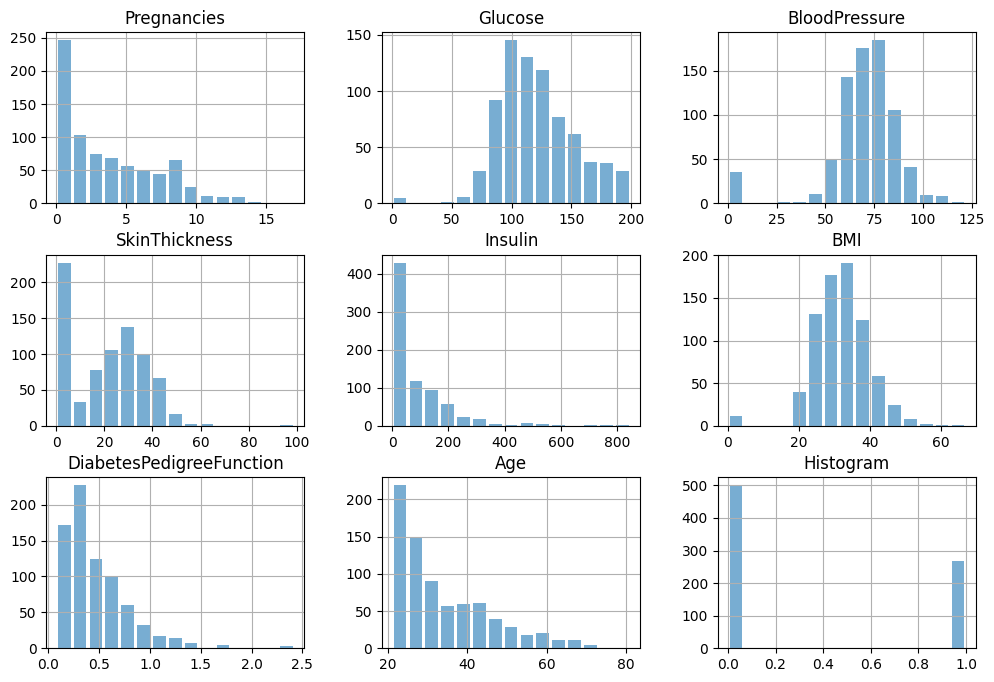

In [11]:
# data[['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].hist(bins=15, figsize=(12,8), alpha=0.6, rwidth=0.8)
data.hist(bins=15, figsize=(12,8), alpha=0.6, rwidth=0.8)

plt.title("Histogram")
plt.show()

<Axes: xlabel='BloodPressure', ylabel='BMI'>

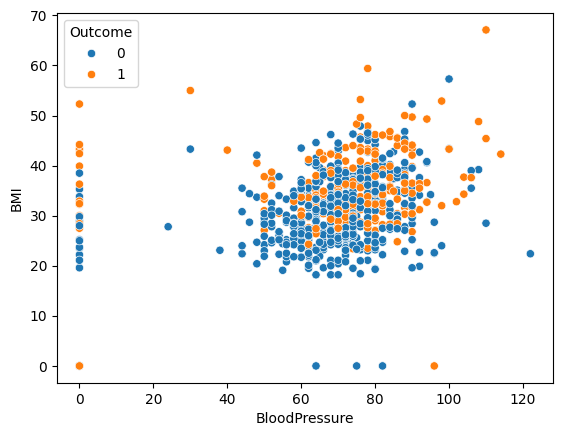

In [12]:
sns.scatterplot(data=data, x="BloodPressure", y="BMI", hue="Outcome")


<Axes: xlabel='BloodPressure', ylabel='Age'>

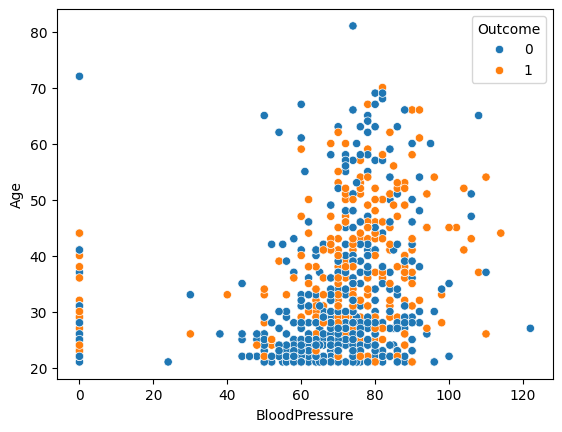

In [13]:
sns.scatterplot(data=data, x="BloodPressure", y="Age", hue="Outcome")

<Axes: xlabel='Glucose', ylabel='Insulin'>

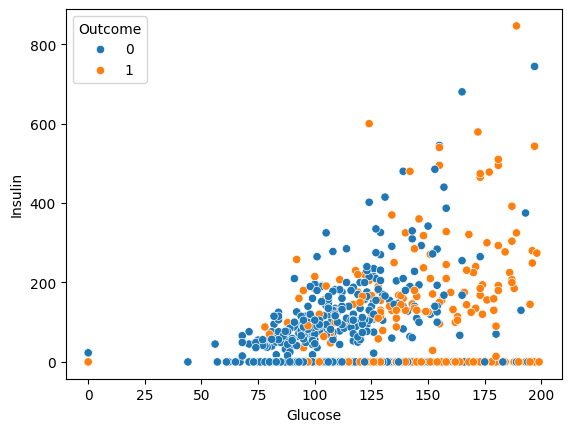

In [14]:
sns.scatterplot(data=data, x="Glucose", y="Insulin", hue="Outcome")

<Axes: xlabel='BloodPressure', ylabel='Age'>

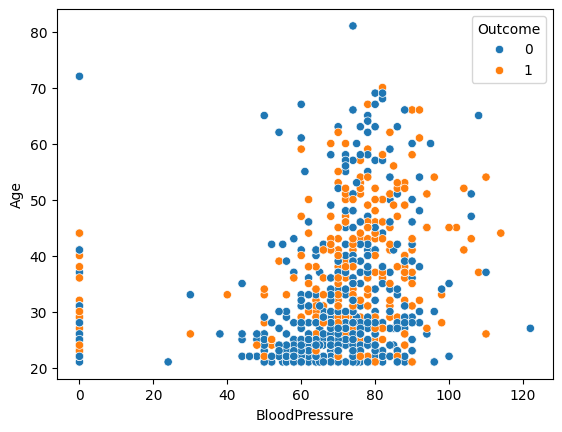

In [15]:
sns.scatterplot(data=data, x="BloodPressure", y="Age", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Age'>

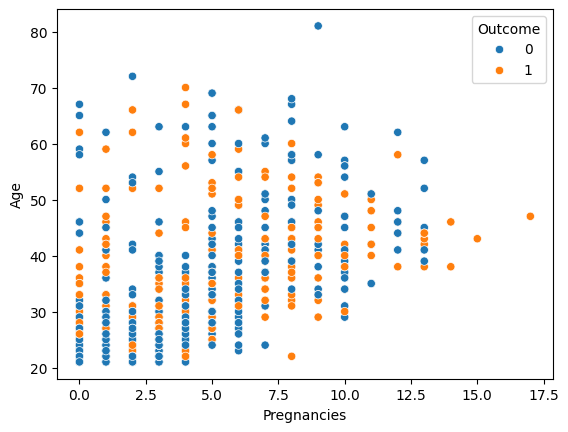

In [16]:
sns.scatterplot(data=data, x="Pregnancies", y="Age", hue="Outcome")

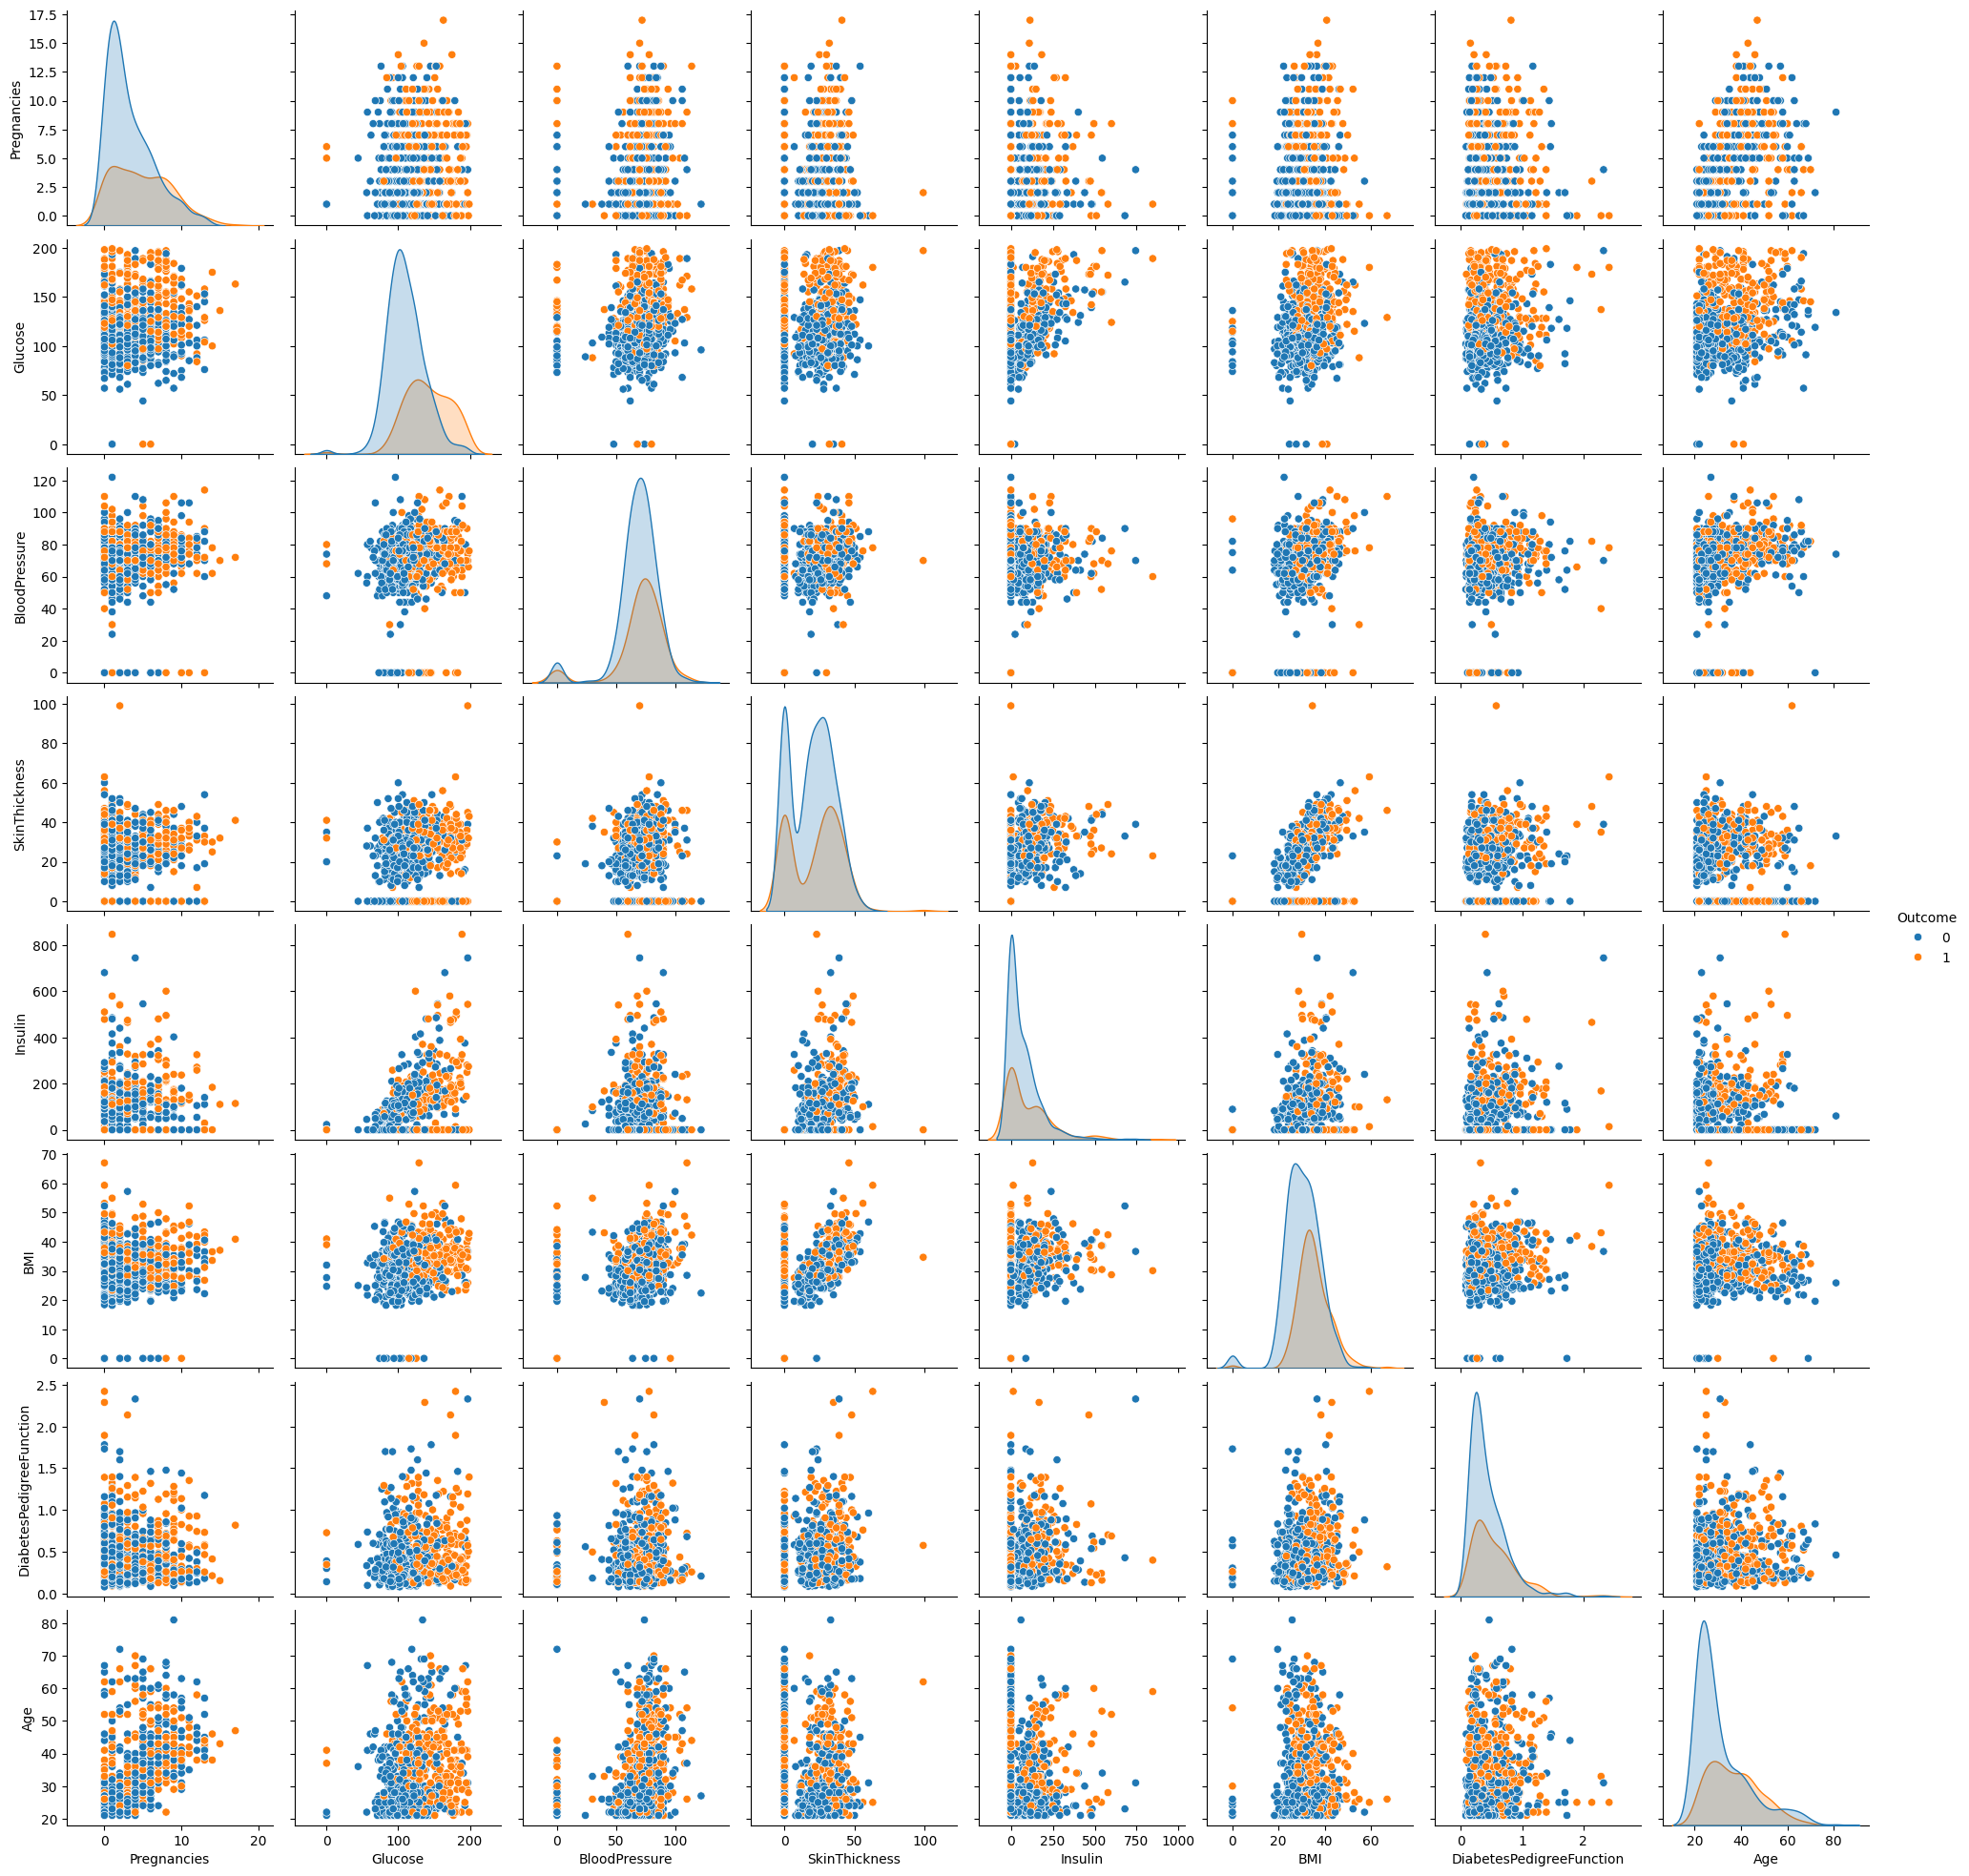

In [17]:
sns.pairplot(data,hue="Outcome")

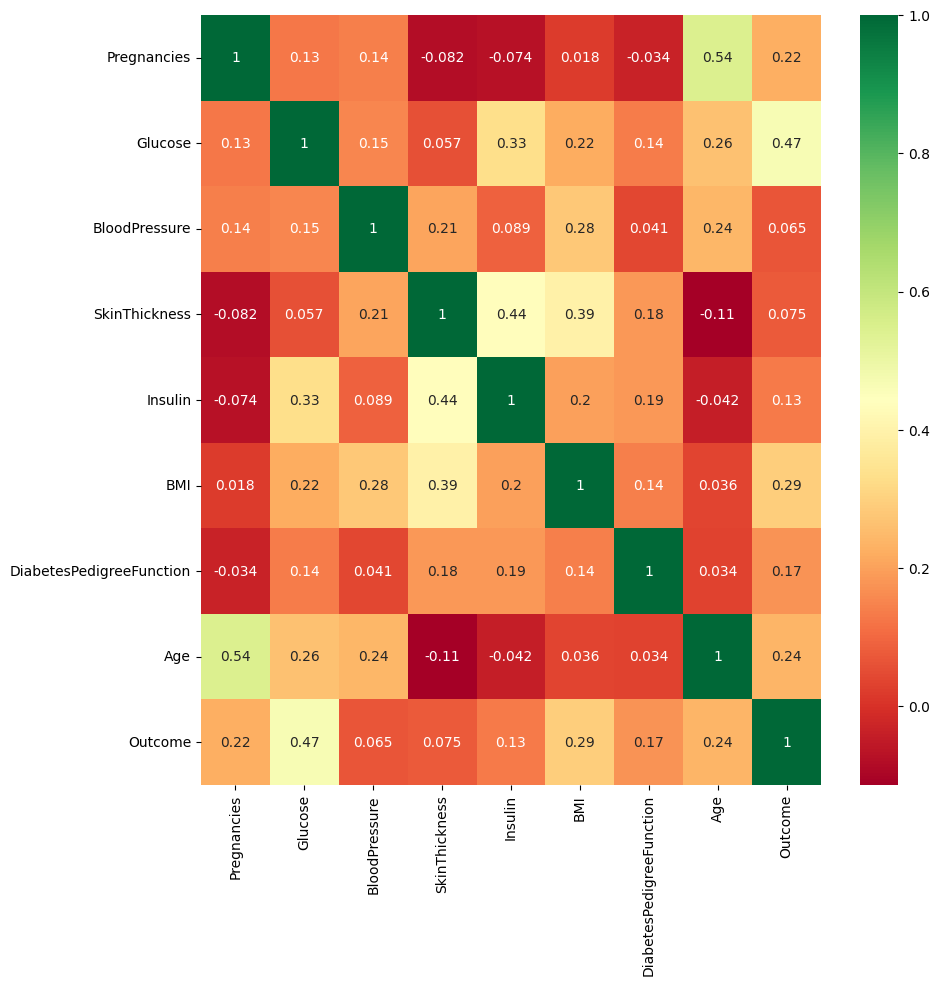

In [18]:
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn")

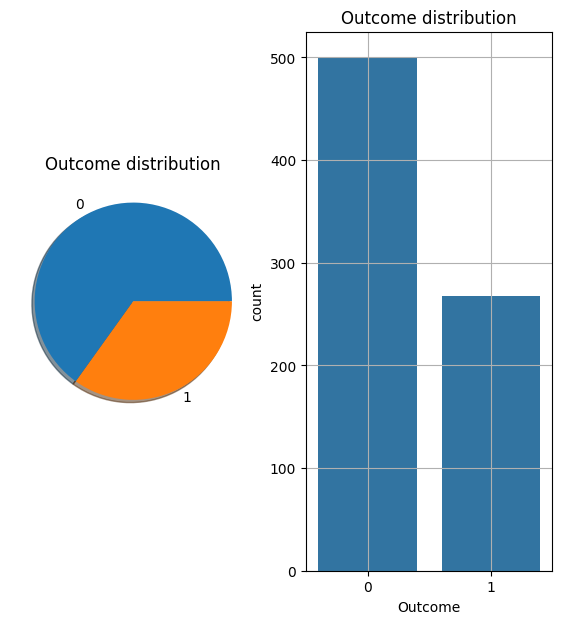

In [19]:
f, ax = plt.subplots(1, 2, figsize=(7, 7))


data['Outcome'].value_counts().plot.pie(ax=ax[0], shadow=True)
ax[0].set_title('Outcome distribution')
ax[0].set_ylabel('')

sns.countplot(x = 'Outcome', data=data, ax=ax[1])
ax[1].set_title('Outcome distribution')

for a in ax:
    a.grid()

plt.show()

# **`Data PreProcessing`**

In [20]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 227


In [22]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())



In [23]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 0
number of rows missing Glucose: 0
number of rows missing BloodPressure: 0
number of rows missing Insulin: 0
number of rows missing BMI: 0
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 0


# **Removing Outliers**

**Findind the outliers using Z-score**

In [24]:
outliers = []
def find_outliers(d):
  threshold = 3
  mean = np.mean(d)
  std = np.std(d)

  for i in d:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers



In [25]:
outliers_pt = find_outliers(data['BloodPressure'])
outliers_pt

[30.0, 110.0, 122.0, 30.0, 110.0, 110.0, 24.0, 114.0]

**Finding outliers usinf IQR**

In [26]:
d = sorted(data['BloodPressure'])
d

[24.0,
 30.0,
 30.0,
 38.0,
 40.0,
 44.0,
 44.0,
 44.0,
 44.0,
 46.0,
 46.0,
 48.0,
 48.0,
 48.0,
 48.0,
 48.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 52.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 54.0,
 55.0,
 55.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 61.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,

In [27]:
q1, q2 = np.percentile(d,[10,90])

In [28]:
print(q1,q2)

58.0 88.0


In [29]:
iqr = q2-q1

In [30]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q2 + (1.5 * iqr)
print(lower_bound,upper_bound)

13.0 133.0


In [31]:
outliers2 = []
for i in d:
  if i< lower_bound or i > upper_bound:
    outliers2.append(i)
print(outliers2)

[]


In [32]:
# x = []
x = data[(data['BloodPressure']<upper_bound) & (data['BloodPressure']>lower_bound)]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [33]:
x.shape


(768, 9)

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [35]:

new_data = data
# new_data = (new_data.loc[:, new_data.columns != 'Outcome'])
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [36]:
x = 'BloodPressure'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
x = 'BMI'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [38]:
x = 'Glucose'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [39]:
x = 'Age'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [40]:
x = 'SkinThickness'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [41]:
x = 'DiabetesPedigreeFunction'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [42]:
x = 'Pregnancies'
upper_limit = new_data[x].mean() + 3*new_data[x].std()
lower_limit = new_data[x].mean() - 3*new_data[x].std()
# print(lower_limit, upper_limit)
new_data = new_data[(new_data[x] < upper_limit) & (new_data[x] > lower_limit)]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [43]:
new_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.816076,120.924350,72.079817,26.305837,117.941435,32.185468,0.448411,32.949591,0.343324
std,3.277142,30.058671,11.300025,9.047514,90.656691,6.464694,0.279837,11.384819,0.475142
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.500000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.364500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.750000,36.175000,0.600750,40.000000,1.000000
max,13.000000,199.000000,108.000000,54.000000,846.000000,52.300000,1.441000,68.000000,1.000000


In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Age'>

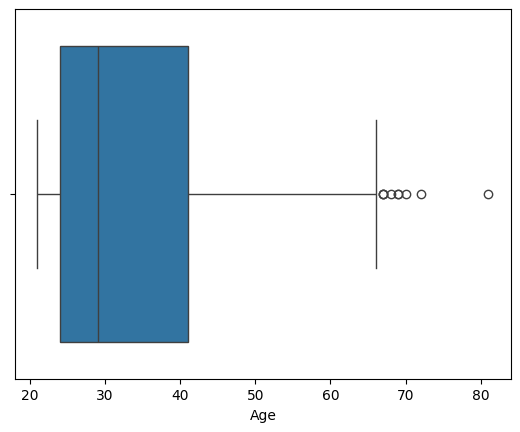

In [45]:
sns.boxplot(data=data, x="Age")

<Axes: xlabel='Age'>

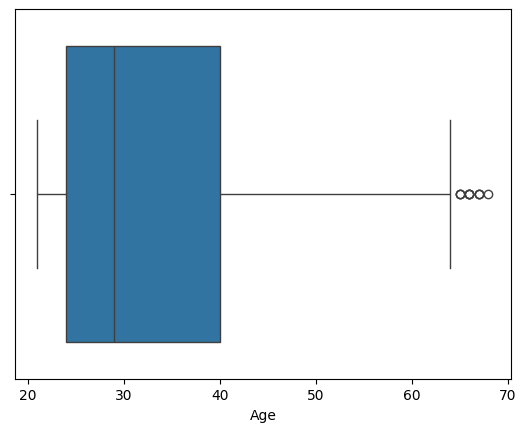

In [46]:
sns.boxplot(data=new_data, x="Age")


In [47]:
edata = new_data
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [48]:
# out = new_data['Outcome']
# new_data = new_data.loc[:, new_data.columns != 'Outcome']
# new_data

In [49]:

# import scipy
# from scipy import stats

# new_data = stats.zscore(new_data)
# new_data


In [50]:
# new_data['Outcome'] = out
# new_data

Random forest unstandard data

In [51]:
y = new_data['Outcome']
X = new_data.drop('Outcome', axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

In [53]:
score = []
X

array([[ 0.6668655 ,  0.9013743 , -0.00706828, ...,  0.21895808,
         0.63862341,  1.49866551],
       [-0.85989457, -1.19595596, -0.53840262, ..., -0.86458483,
        -0.34833827, -0.17136159],
       [ 1.27756953,  2.06655778, -0.71551407, ..., -1.37539791,
         0.79954107, -0.08346543],
       ...,
       [ 0.36151349,  0.00251847, -0.00706828, ..., -0.92650156,
        -0.72738877, -0.25925776],
       [-0.85989457,  0.16897325, -1.06973696, ..., -0.32281337,
        -0.35549016,  1.23497702],
       [-0.85989457, -0.92962831, -0.18417973, ..., -0.27637582,
        -0.4770724 , -0.8745309 ]])

**Train Test Split**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

**LogisticRegression**

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [56]:
lr_pred = lr.predict(X_test)
from sklearn import metrics
temp = metrics.accuracy_score(y_test, lr_pred)
score.append(temp)
print("Accuracy = {0:.3f}".format(temp))

Accuracy = 0.735


**KNN**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
knn_pred = knn.predict(X_test)
temp = metrics.accuracy_score(y_test, knn_pred)
score.append(temp)
print("Accuracy = {0:.3f}".format(temp))

Accuracy = 0.721


**Naive Bayes Classifiers**

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [60]:
nb_pred = nb.predict(X_test)
temp = metrics.accuracy_score(y_test, nb_pred)
score.append(temp)
print("Accuracy = {0:.3f}".format(temp))

Accuracy = 0.687



**Support Vector Machine**

In [61]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [62]:
sv_pred = sv.predict(X_test)
temp = metrics.accuracy_score(y_test, sv_pred)
score.append(temp)
print("Accuracy = {0:.3f}".format(temp))

Accuracy = 0.714


**Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
dt_pred = dt.predict(X_test)
temp = metrics.accuracy_score(y_test, dt_pred)
score.append(temp)
print("Accuracy = {0:.3f}".format(temp))

Accuracy = 0.701


**Random Forst**

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy')

In [66]:
# rf_pred = rf.predict(X_test)
# print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, rf_pred)))
rf_pred = rf.predict(X_test)
temp = metrics.accuracy_score(y_test, rf_pred)
score.append(temp)
print("Accuracy = {0:.3f}".format(temp))

Accuracy = 0.687


In [67]:
algos = ["Logistic_Regression", "KNN", "Naive_Buyers", "Support_Vector_Machine", "Decision_Tree", "Random_Forest"]


In [68]:
df = pd.DataFrame()
df['Name'] = algos
df['Acuracy'] = score
df

,Name,Acuracy
0,Logistic_Regression,0.734694
1,KNN,0.721088
2,Naive_Buyers,0.687075
3,Support_Vector_Machine,0.714286
4,Decision_Tree,0.700680
5,Random_Forest,0.687075


In [69]:
z = sns.light_palette("green", as_cmap = True)
s = df.style.background_gradient(cmap=z)
s

,Name,Acuracy
0,Logistic_Regression,0.734694
1,KNN,0.721088
2,Naive_Buyers,0.687075
3,Support_Vector_Machine,0.714286
4,Decision_Tree,0.700680
5,Random_Forest,0.687075


## ***Evaluation***

**LR**

In [70]:
from sklearn.metrics import classification_report, confusion_matrix


In [71]:
cm_lr = confusion_matrix(y_test, lr_pred)
cm_lr


array([[80, 16],
       [23, 28]])

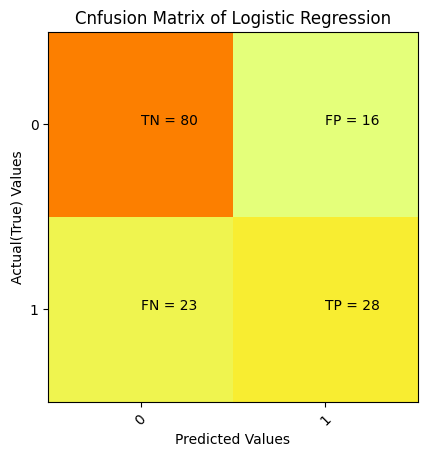

In [72]:
plt.clf()
plt.imshow(cm_lr, interpolation='nearest', cmap= plt.cm.Wistia)
classNames = ['0','1']
plt.title('Cnfusion Matrix of Logistic Regression')
plt.ylabel('Actual(True) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+ " = "+ str(cm_lr[i][j]))

In [73]:
matrix = classification_report(y_test, lr_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        96
           1       0.64      0.55      0.59        51

    accuracy                           0.73       147
   macro avg       0.71      0.69      0.70       147
weighted avg       0.73      0.73      0.73       147



**KNN**

In [74]:
cm_knn = confusion_matrix(y_test, knn_pred)
cm_knn


array([[76, 20],
       [21, 30]])

In [75]:
matrix = classification_report(y_test, knn_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        96
           1       0.60      0.59      0.59        51

    accuracy                           0.72       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.72      0.72      0.72       147



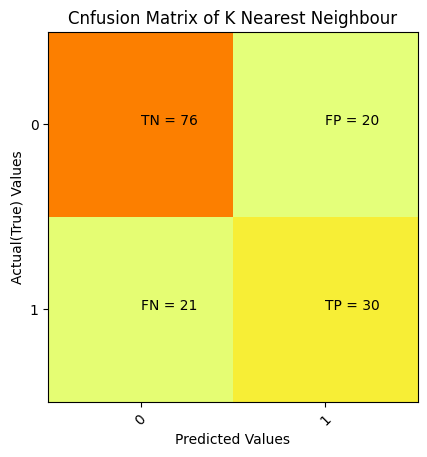

In [76]:
plt.clf()
plt.imshow(cm_knn, interpolation='nearest', cmap= plt.cm.Wistia)
classNames = ['0','1']
plt.title('Cnfusion Matrix of K Nearest Neighbour')
plt.ylabel('Actual(True) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+ " = "+ str(cm_knn[i][j]))

**Naive Bayes**

In [77]:
cm_nb = confusion_matrix(y_test, nb_pred)
cm_nb

array([[74, 22],
       [24, 27]])

In [78]:
matrix = classification_report(y_test, nb_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        96
           1       0.55      0.53      0.54        51

    accuracy                           0.69       147
   macro avg       0.65      0.65      0.65       147
weighted avg       0.68      0.69      0.69       147



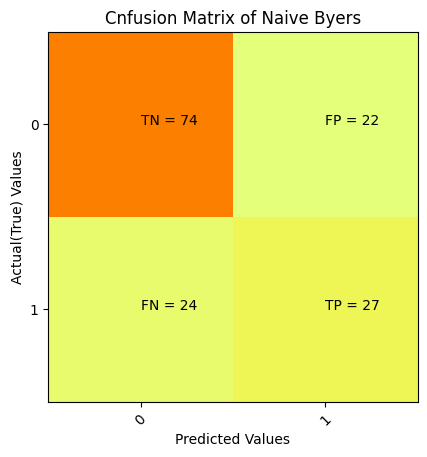

In [79]:
plt.clf()
plt.imshow(cm_nb, interpolation='nearest', cmap= plt.cm.Wistia)
classNames = ['0','1']
plt.title('Cnfusion Matrix of Naive Byers')
plt.ylabel('Actual(True) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+ " = "+ str(cm_nb[i][j]))

**Support Vector Machine**

In [80]:
cm_sv = confusion_matrix(y_test, sv_pred)
cm_sv

array([[79, 17],
       [25, 26]])

In [81]:
matrix = classification_report(y_test, sv_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        96
           1       0.60      0.51      0.55        51

    accuracy                           0.71       147
   macro avg       0.68      0.67      0.67       147
weighted avg       0.71      0.71      0.71       147



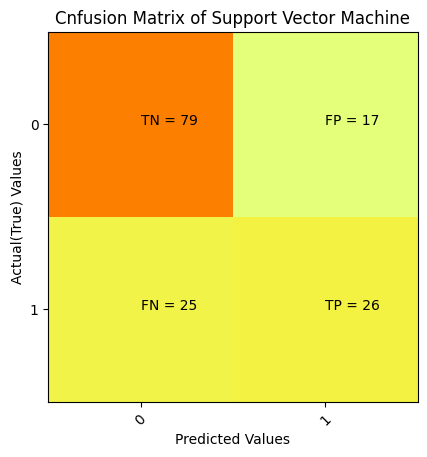

In [82]:
plt.clf()
plt.imshow(cm_sv, interpolation='nearest', cmap= plt.cm.Wistia)
classNames = ['0','1']
plt.title('Cnfusion Matrix of Support Vector Machine')
plt.ylabel('Actual(True) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+ " = "+ str(cm_sv[i][j]))

Decision Tree

In [83]:
cm_dt = confusion_matrix(y_test, dt_pred)
cm_dt

array([[73, 23],
       [21, 30]])

In [84]:
matrix = classification_report(y_test, dt_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        96
           1       0.57      0.59      0.58        51

    accuracy                           0.70       147
   macro avg       0.67      0.67      0.67       147
weighted avg       0.70      0.70      0.70       147



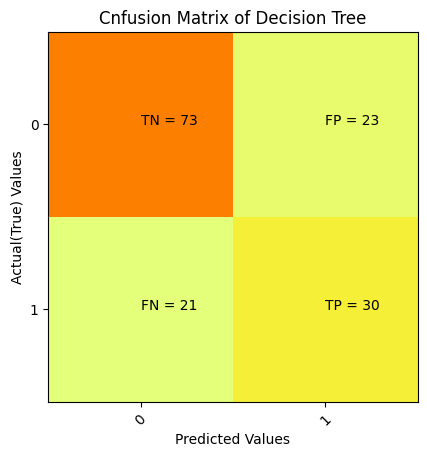

In [85]:
plt.clf()
plt.imshow(cm_dt, interpolation='nearest', cmap= plt.cm.Wistia)
classNames = ['0','1']
plt.title('Cnfusion Matrix of Decision Tree')
plt.ylabel('Actual(True) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+ " = "+ str(cm_dt[i][j]))

**Random Forest**

In [86]:
cm_rf = confusion_matrix(y_test, rf_pred)
cm_rf

array([[77, 19],
       [27, 24]])

In [87]:
matrix = classification_report(y_test, rf_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        96
           1       0.56      0.47      0.51        51

    accuracy                           0.69       147
   macro avg       0.65      0.64      0.64       147
weighted avg       0.68      0.69      0.68       147



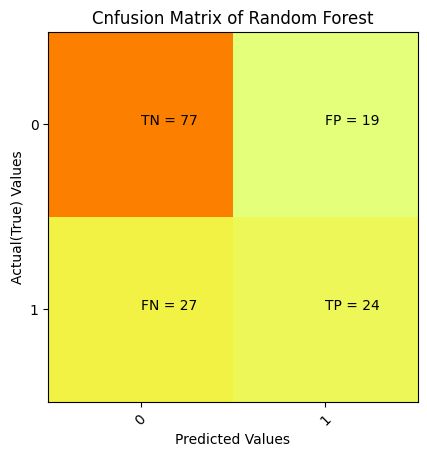

In [88]:
plt.clf()
plt.imshow(cm_rf, interpolation='nearest', cmap= plt.cm.Wistia)
classNames = ['0','1']
plt.title('Cnfusion Matrix of Random Forest')
plt.ylabel('Actual(True) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+ " = "+ str(cm_rf[i][j]))

In [89]:
edata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [90]:
earray = edata.values

In [91]:
earray

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

Adaboost

In [92]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

X = earray[:, 0:8]
Y = earray[:, 8]
seed = 7
num_trees = 30

kfold= model_selection.KFold(n_splits=10,random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
eresult = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(eresult.mean())
score.append(eresult.mean())
algos.append("AdaBoost")

0.7685486856719732


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

cm

array([[109,  34],
       [ 28,  50]])

In [94]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       143
         1.0       0.60      0.64      0.62        78

    accuracy                           0.72       221
   macro avg       0.70      0.70      0.70       221
weighted avg       0.72      0.72      0.72       221



XGBClassifer

In [95]:
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()

seed = 7
num_trees = 30
kfold= model_selection.KFold(n_splits=10,random_state=seed, shuffle=True)
model = XGBClassifier(n_estimators=num_trees, random_state=seed)
eresult = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(eresult.mean())
score.append(eresult.mean())
algos.append("XGBClassifier")

0.7631432802665679


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

cm

array([[110,  33],
       [ 28,  50]])

In [97]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78       143
         1.0       0.60      0.64      0.62        78

    accuracy                           0.72       221
   macro avg       0.70      0.71      0.70       221
weighted avg       0.73      0.72      0.73       221



Ensamble learning using Decision Tree, Knn, SVM

In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [99]:
seed = 42

tree = DecisionTreeClassifier(random_state=seed)
knn = KNeighborsClassifier()
svm = SVC(random_state=seed)

ensemble = VotingClassifier(estimators=[('tree', tree), ('knn', knn), ('svm', svm)], voting='hard')

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)

score.append(results.mean())
algos.append("Voting Classifier")

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 74.81% (4.92%)


  Confusion matrix

In [100]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=seed)

# train the ensemble classifier on the training data
ensemble.fit(X_train, Y_train)

# make predictions on the testing data using the ensemble classifier
Y_pred = ensemble.predict(X_test)

# create a confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

print(conf_mat)

[[79 16]
 [25 27]]


In [101]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79        95
         1.0       0.63      0.52      0.57        52

    accuracy                           0.72       147
   macro avg       0.69      0.68      0.68       147
weighted avg       0.71      0.72      0.71       147



In [102]:
algos

['Logistic_Regression',
 'KNN',
 'Naive_Buyers',
 'Support_Vector_Machine',
 'Decision_Tree',
 'Random_Forest',
 'AdaBoost',
 'XGBClassifier',
 'Voting Classifier']

In [103]:
score

[0.7346938775510204,
 0.7210884353741497,
 0.6870748299319728,
 0.7142857142857143,
 0.7006802721088435,
 0.6870748299319728,
 0.7685486856719732,
 0.7631432802665679,
 0.7481118104405775]

In [104]:
df = pd.DataFrame()
df['Name'] = algos
df['Acuracy'] = score
df

,Name,Acuracy
0,Logistic_Regression,0.734694
1,KNN,0.721088
2,Naive_Buyers,0.687075
3,Support_Vector_Machine,0.714286
4,Decision_Tree,0.700680
5,Random_Forest,0.687075
6,AdaBoost,0.768549
7,XGBClassifier,0.763143
8,Voting Classifier,0.748112


In [105]:
z = sns.light_palette("green", as_cmap = True)
s = df.style.background_gradient(cmap=z)
s

,Name,Acuracy
0,Logistic_Regression,0.734694
1,KNN,0.721088
2,Naive_Buyers,0.687075
3,Support_Vector_Machine,0.714286
4,Decision_Tree,0.700680
5,Random_Forest,0.687075
6,AdaBoost,0.768549
7,XGBClassifier,0.763143
8,Voting Classifier,0.748112
